In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##### Import all data

In [2]:
years = [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
data = []

for year in years:
    small_df = pd.read_html("https://www.espncricinfo.com/table/series/8048/season/" + str(year) + "/indian-premier-league")
    small_df = small_df[0]
    
    small_df["TEAMS"] = small_df["TEAMS"].str.replace("\d+", "")
    small_df["FOR"] = small_df["FOR"].str[:4]
    small_df["AGAINST"] = small_df["AGAINST"].str[:4]
    small_df.insert(1, "SEASON", str(year))
    
    data.append(small_df)

df = pd.concat(data)

df.replace({"Kings XI Punjab": "Punjab Kings"}, inplace=True)
df.replace({"Delhi Daredevils": "Delhi Capitals"}, inplace=True)
df[["FOR", "AGAINST"]] = df[["FOR", "AGAINST"]].apply(pd.to_numeric)

df = df.set_index(["TEAMS", "SEASON"]).sort_index()

df.drop(["Rising Pune Supergiant", "Rising Pune Supergiants", "Pune Warriors",
         "Kochi Tuskers Kerala", "Deccan Chargers", "Gujarat Lions"], inplace=True)

C:\Users\zacfw\AppData\Local\Temp/ipykernel_15052/2696903652.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  small_df["TEAMS"] = small_df["TEAMS"].str.replace("\d+", "")


In [3]:
df

M  W   L    T  N/R  PT    NRR   FOR  AGAINST
TEAMS               SEASON                                               
Chennai Super Kings 2008    14  8   6  0.0    0  16 -0.192  2241     2195
                    2009    14  8   5  0.0    1  17  0.951  2086     1855
                    2010    14  7   7  0.0    0  14  0.268  2285     2257
                    2011    14  9   5  0.0    0  18  0.443  2118     1978
                    2012    16  8   7  0.0    1  17  0.100  2232     2144
...                         .. ..  ..  ...  ...  ..    ...   ...      ...
Sunrisers Hyderabad 2017    14  8   5  0.0    1  17  0.599  2221     2118
                    2018    14  9   5  0.0    0  18  0.284  2230     2193
                    2019    14  6   8  0.0    0  12  0.577  2288     2200
                    2020    14  7   7  NaN    0  14  0.608  2225     2125
                    2021    14  3  11  0.0    0   6 -0.545  2077     2216

[103 rows x 9 columns]

To find season table:

> df.loc[pd.IndexSlice[:, **"year"**], :].sort_values("PT", ascending=False)

To find team results:

> df.loc[**"team"**]

In [4]:
#  Pythagorean expectation
#  Use to calculate k using MSE

def pythagExpectForK(runsFor, runsAgainst, M, k):
    
    predWinPercent = (runsFor ** k / (runsFor ** k + runsAgainst ** k))
    predWins = round(predWinPercent * M, 0)
    
    return predWinPercent, predWins

8.0618


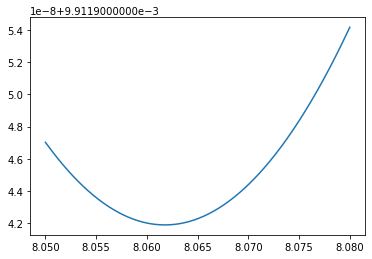

In [5]:
exp = np.linspace(8.05, 8.08, 301)  # Found to be between 8 and 8.2 from previous iterations

temp = []
MSE = []

for i in exp:
    for j in range(len(df)):
        
        predWinPercent, _ = pythagExpectForK(df.loc[df.index[j], "FOR"], df.loc[df.index[j], "AGAINST"],
                                         df.loc[df.index[j], "M"], i)
        
        trueWinPercent = df.loc[df.index[j], "W"] / df.loc[df.index[j], "M"]
        
        temp.append((predWinPercent - trueWinPercent) ** 2)

    MSE.append(sum(temp) / len(temp))

#  To find lowest value for k

MSE = np.array(MSE)
exp = np.array(exp)
zipped = zip(exp, MSE)

for i in zipped:
    if MSE.min() in i:
        print(i[0])    
    
plt.plot(exp, MSE)  # Visualise MSE

##### k = 8.062

In [6]:
#  Pythagorean expectation using calculated k

def pythagExpect(runsFor, runsAgainst, M):
    
    predWinPercent = (runsFor ** 8.062 / (runsFor ** 8.062 + runsAgainst ** 8.062))
    predWins = round(predWinPercent * M, 0)
    
    return predWinPercent, predWins

In [7]:
#  Test

runsFor = 2241
runsAgainst = 2195
M = 14

predWinPercent, predWins = pythagExpect(runsFor, runsAgainst, M)

print("Predicted number of wins:", predWins, "\nPredicted win %:", predWinPercent)  # Pred win needed?

Predicted number of wins: 8.0 
Predicted win %: 0.5417046485313731


In [8]:
df["WIN %"] = (df["W"] / df["M"])
df["PRED WIN %"], _ = pythagExpect(df["FOR"], df["AGAINST"], df["M"])

In [9]:
df

M  W   L    T  N/R  PT    NRR   FOR  AGAINST  \
TEAMS               SEASON                                                  
Chennai Super Kings 2008    14  8   6  0.0    0  16 -0.192  2241     2195   
                    2009    14  8   5  0.0    1  17  0.951  2086     1855   
                    2010    14  7   7  0.0    0  14  0.268  2285     2257   
                    2011    14  9   5  0.0    0  18  0.443  2118     1978   
                    2012    16  8   7  0.0    1  17  0.100  2232     2144   
...                         .. ..  ..  ...  ...  ..    ...   ...      ...   
Sunrisers Hyderabad 2017    14  8   5  0.0    1  17  0.599  2221     2118   
                    2018    14  9   5  0.0    0  18  0.284  2230     2193   
                    2019    14  6   8  0.0    0  12  0.577  2288     2200   
                    2020    14  7   7  NaN    0  14  0.608  2225     2125   
                    2021    14  3  11  0.0    0   6 -0.545  2077     2216   

                               WIN %  PRED WIN %  
TEAMS               SEASON                        
Chennai Super Kings 2008    0.571429    0.541705  
                    2009    0.571429    0.720347  
                    2010    0.500000    0.524830  
                    2011    0.642857    0.634444  
                    2012    0.500000    0.580370  
...                              ...         ...  
Sunrisers Hyderabad 2017    0.571429    0.594555  
                    2018    0.642857    0.533671  
                    2019    0.428571    0.578397  
                    2020    0.500000    0.591636  
                    2021    0.214286    0.372326  

[103 rows x 11 columns]

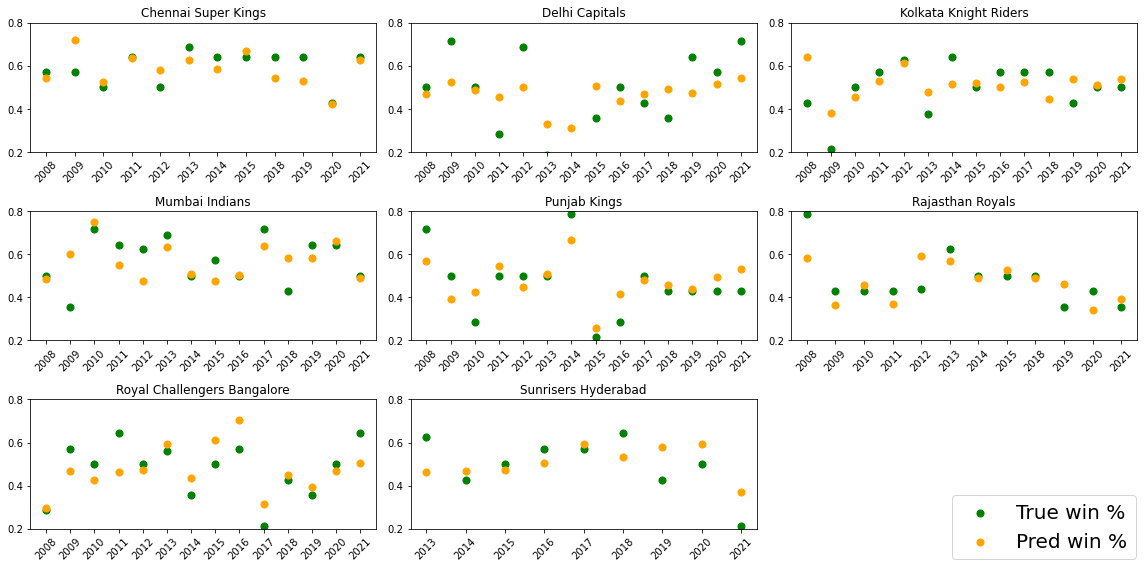

In [10]:
teams = df.index.get_level_values("TEAMS").unique()
i = 0

fig, axs = plt.subplots(3, 3, figsize=(16, 8))
axs = axs.ravel()

for team in teams:
    
    temp_df = df.loc[team, :]
    temp_df.reset_index(inplace=True)

    axs[i].scatter(temp_df["SEASON"], temp_df["WIN %"], label="True win %", c="g", s=50)
    axs[i].scatter(temp_df["SEASON"], temp_df["PRED WIN %"], label="Pred win %", c="orange", s=50)
    
    axs[i].tick_params(axis="x", labelrotation=45)
    axs[i].set_ylim([0.2, 0.8])
    #axs[i].legend()
    axs[i].title.set_text(team)
    
    i += 1

handles, labels = axs[1].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower right', prop={'size': 20})

fig.delaxes(axs[8])
fig.tight_layout()

##### What now..?